In [ ]:
## Import packages
## load the ds
## shape
#info
## descriptive statistics
## countplot for categorical with single column
## countplot with two categorical
## Box plot for numerical
## Boxplot for one cat and one num
## violinplot for two categ and one num
## pairplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loanamount_med=df["LoanAmount"].median()
loanamount_med

128.0

In [8]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,loanamount_med)

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
term_med=df["Loan_Amount_Term"].median()
term_med

360.0

In [12]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,term_med)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
cred_med=df["Credit_History"].median()
cred_med

1.0

In [15]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,cred_med)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
gen_mode=df["Gender"].mode()[0]
gen_mode

'Male'

In [21]:
df["Gender"]=df["Gender"].replace(np.nan,gen_mode)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
self_emp_mode=df["Self_Employed"].mode()[0]
self_emp_mode

'No'

In [24]:
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,self_emp_mode)

In [25]:
marr_mode=df["Married"].mode()[0]
marr_mode

'Yes'

In [26]:
df["Married"]=df["Married"].replace(np.nan,marr_mode)

In [27]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [29]:
df["Dependents"]=df["Dependents"].replace("3+",4)

In [30]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
df["Dependents"]=df["Dependents"].astype(float)

In [32]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
mean_dep=df["Dependents"].mean()
mean_dep

0.8480801335559266

In [34]:
df["Dependents"]=df["Dependents"].replace(np.nan,mean_dep)

In [35]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='LoanAmount'>

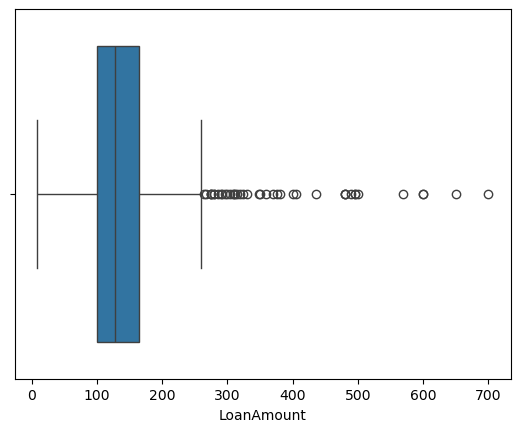

In [36]:
sns.boxplot(x="LoanAmount",data=df)

In [37]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [38]:
lowamount,uppamount=remove_outlier(df["LoanAmount"])
df["LoanAmount"]=np.where(df["LoanAmount"]>uppamount,uppamount,df["LoanAmount"])
df["LoanAmount"]=np.where(df["LoanAmount"]<lowamount,lowamount,df["LoanAmount"])

<Axes: xlabel='LoanAmount'>

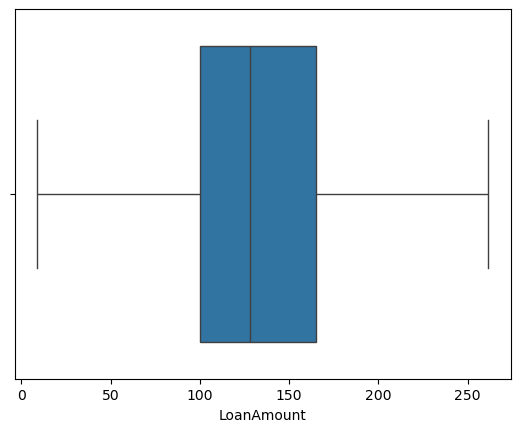

In [39]:
sns.boxplot(x="LoanAmount",data=df)

In [40]:
df.shape

(614, 13)

<Axes: xlabel='ApplicantIncome'>

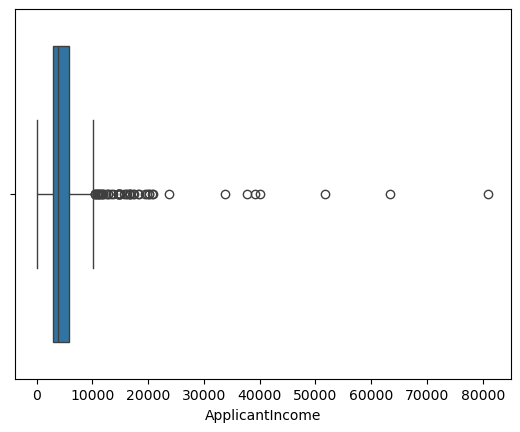

In [41]:
sns.boxplot(x="ApplicantIncome",data=df)

In [42]:
lowincome,uppincome=remove_outlier(df["ApplicantIncome"])
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]>uppincome,uppincome,df["ApplicantIncome"])
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]<lowincome,lowincome,df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome'>

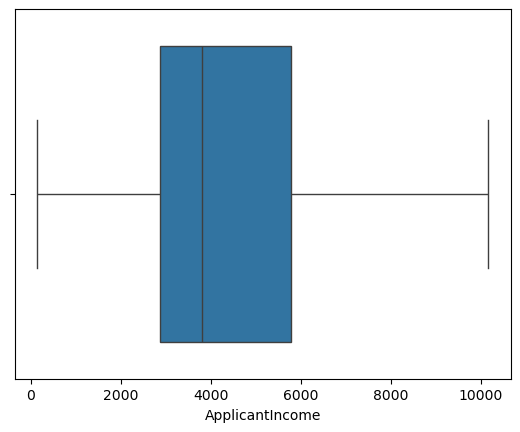

In [43]:
sns.boxplot(x="ApplicantIncome",data=df)

In [44]:
### Dropping insignificant column
df=df.drop("Loan_ID",axis=1)

In [45]:
df.shape

(614, 12)

In [47]:
### Categorical->Numerical (Encoding)
df=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area"])

In [48]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849.0,0.0,128.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
1,1.0,4583.0,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
2,0.0,3000.0,0.0,66.0,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
3,0.0,2583.0,2358.0,120.0,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
4,0.0,6000.0,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True


In [49]:
df.dtypes

Dependents                 float64
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Education_Graduate            bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

In [50]:
df.shape

(614, 18)